<a href="https://colab.research.google.com/github/su-zu-me/RF_Model_Tutorial/blob/main/Pokemon-classification/RF_model_Pokemon_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import


> import package in python




In [2]:
!pip install shap

     |████████████████████████████████| 358kB 8.5MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=6fc21b13cad903304751578513193c6b569c353f702344b33833209ad0f4eda1
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [3]:
import shap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from IPython.display import display, HTML

# Data process

> Pokemon dataset from Kaggle
>
> Aim: Classify **18 main type** of 802 pokemons


---


> Save data as **pandas dataframe** format
>
> 2D array and use column name (feature name) as first index and row (samples) as second index
>
> Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html








In [4]:
url = 'https://raw.githubusercontent.com/su-zu-me/RF_Model_Tutorial/main/Pokemon-classification/pokemon.csv'
ori_data = pd.read_csv(url) # save ori data and save as "pandas dataframe" format 
data = pd.read_csv(url)   # change some data type

pokemon_info = data[['pokedex_number', 'name', 'type1']]

data.head() # output top5 samples of data

,pokedex_number,name,abilities,generation,classfication,is_legendary,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,hp,sp_attack,sp_defense,speed,type1
0,1,Bulbasaur,"['Overgrow', 'Chlorophyll']",1,Seed Pokemon,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,49,1059860,45,65,65,45,grass
1,2,Ivysaur,"['Overgrow', 'Chlorophyll']",1,Seed Pokemon,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,63,1059860,60,80,80,60,grass
2,3,Venusaur,"['Overgrow', 'Chlorophyll']",1,Seed Pokemon,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,123,1059860,80,122,120,80,grass
3,4,Charmander,"['Blaze', 'Solar Power']",1,Lizard Pokemon,0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,43,1059860,39,60,50,65,fire
4,5,Charmeleon,"['Blaze', 'Solar Power']",1,Flame Pokemon,0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,58,1059860,58,80,65,80,fire


In [5]:
# Example for Dataframe format

print(data['name'], "\n\n")  # show all samples name
print(data['name'][0])    # show first sample (index:0) name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      


0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, Length: 801, dtype: object 


Bulbasaur


In [6]:
data.dtypes

pokedex_number         int64
name                  object
abilities             object
generation             int64
classfication         object
is_legendary           int64
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
defense                int64
experience_growth      int64
hp                     int64
sp_attack              int64
sp_defense             int64
speed         

Dataframe.items( )

> Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.items.html
> 
> Iterate over (column name, Samples) pairs.
>
> **label:** The column names for the DataFrame being iterated over.
>
> **content:** (Smaples) The column entries belonging to each label, as a Series.


In [7]:
for label, content in data.items():
  print("label name: ", label, "\n")
  
  print("Smaples of label:")
  print(content, "\n")
  print("-"*50, "\n")

label name:  pokedex_number 

Smaples of label:
0        1
1        2
2        3
3        4
4        5
      ... 
796    797
797    798
798    799
799    800
800    801
Name: pokedex_number, Length: 801, dtype: int64 

-------------------------------------------------- 

label name:  name 

Smaples of label:
0       Bulbasaur
1         Ivysaur
2        Venusaur
3      Charmander
4      Charmeleon
          ...    
796    Celesteela
797       Kartana
798      Guzzlord
799      Necrozma
800      Magearna
Name: name, Length: 801, dtype: object 

-------------------------------------------------- 

label name:  abilities 

Smaples of label:
0      ['Overgrow', 'Chlorophyll']
1      ['Overgrow', 'Chlorophyll']
2      ['Overgrow', 'Chlorophyll']
3         ['Blaze', 'Solar Power']
4         ['Blaze', 'Solar Power']
                  ...             
796                ['Beast Boost']
797                ['Beast Boost']
798                ['Beast Boost']
799                ['Prism Armor']
800  

In [8]:
# convert not numeric type to category
for label,content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = data[label].astype('category')

In [9]:
data.dtypes

pokedex_number          int64
name                 category
abilities            category
generation              int64
classfication        category
is_legendary            int64
against_bug           float64
against_dark          float64
against_dragon        float64
against_electric      float64
against_fairy         float64
against_fight         float64
against_fire          float64
against_flying        float64
against_ghost         float64
against_grass         float64
against_ground        float64
against_ice           float64
against_normal        float64
against_poison        float64
against_psychic       float64
against_rock          float64
against_steel         float64
against_water         float64
attack                  int64
base_egg_steps          int64
base_happiness          int64
base_total              int64
capture_rate         category
defense                 int64
experience_growth       int64
hp                      int64
sp_attack               int64
sp_defense

In [10]:
data.head()

,pokedex_number,name,abilities,generation,classfication,is_legendary,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,hp,sp_attack,sp_defense,speed,type1
0,1,Bulbasaur,"['Overgrow', 'Chlorophyll']",1,Seed Pokemon,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,49,1059860,45,65,65,45,grass
1,2,Ivysaur,"['Overgrow', 'Chlorophyll']",1,Seed Pokemon,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,63,1059860,60,80,80,60,grass
2,3,Venusaur,"['Overgrow', 'Chlorophyll']",1,Seed Pokemon,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,123,1059860,80,122,120,80,grass
3,4,Charmander,"['Blaze', 'Solar Power']",1,Lizard Pokemon,0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,43,1059860,39,60,50,65,fire
4,5,Charmeleon,"['Blaze', 'Solar Power']",1,Flame Pokemon,0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,58,1059860,58,80,65,80,fire


In [11]:
# categorical to numeric
for label,content in data.items():
    if pd.api.types.is_categorical_dtype(content):
        data[label] = pd.Categorical(content).codes

In [12]:
# output category code and ori data mapping

# zip: merge multiple array   # Reference: https://www.w3schools.com/python/ref_func_zip.asp
# dict: create array but key cannot duplicate   # Refernce: https://www.w3schools.com/python/python_dictionaries.asp
type1_index_info = dict(zip(data['type1'], ori_data['type1']))
print(type1_index_info)

{9: 'grass', 6: 'fire', 17: 'water', 0: 'bug', 12: 'normal', 13: 'poison', 3: 'electric', 10: 'ground', 4: 'fairy', 5: 'fighting', 14: 'psychic', 15: 'rock', 8: 'ghost', 11: 'ice', 2: 'dragon', 1: 'dark', 16: 'steel', 7: 'flying'}


In [13]:
data.head()

,pokedex_number,name,abilities,generation,classfication,is_legendary,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,hp,sp_attack,sp_defense,speed,type1
0,1,72,243,1,448,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,25,49,1059860,45,65,65,45,9
1,2,320,243,1,448,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,25,63,1059860,60,80,80,60,9
2,3,744,243,1,448,0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,25,123,1059860,80,122,120,80,9
3,4,94,21,1,298,0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,25,43,1059860,39,60,50,65,6
4,5,95,21,1,186,0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,25,58,1059860,58,80,65,80,6


In [14]:
X = data.drop(['pokedex_number', 'name', 'type1', 'classfication'], axis=1) # delete, axis=0 for delete sample, and 1 for column (key) 
y = data['type1']

fea_name_list = list(X.columns) # save feature name list

X_train, X_test, y_train, y_test, pokemon_info_train, pokemon_info_test = train_test_split(X, y, pokemon_info, test_size=0.2)  # split train and test dataset

In [15]:
X_train

,abilities,generation,is_legendary,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,hp,sp_attack,sp_defense,speed
493,461,5,1,1.0,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,0.50,2.0,0.5,1.0,1.0,0.50,2.0,0.5,2.0,100,30720,100,600,21,100,1250000,100,100,100,100
378,42,3,1,0.5,1.0,0.5,1.0,0.5,2.0,2.0,0.5,1.0,0.50,2.0,0.5,0.5,0.0,0.50,0.5,0.5,1.0,75,20480,35,580,21,150,1250000,80,75,150,50
188,32,2,0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.25,0.0,4.0,1.0,2.0,1.00,2.0,1.0,0.5,55,5120,70,460,25,70,1059860,75,55,95,110
117,429,1,0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.00,1.0,0.5,0.5,67,5120,70,320,17,60,1000000,45,35,50,63
676,179,6,0,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,48,5120,70,355,13,54,1000000,62,63,60,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,101,6,0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,80,5120,70,472,10,60,1000000,75,65,90,102
653,19,6,0,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.00,2.0,0.5,2.0,59,5120,70,409,25,58,1059860,59,90,70,73
54,63,1,0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.00,1.0,0.5,0.5,82,5120,70,500,31,78,1000000,80,95,80,85
320,477,3,0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.00,1.0,0.5,0.5,90,10240,70,500,28,45,1640000,170,90,45,60


In [16]:
y_train

493    14
378    16
188     9
117    17
676    14
       ..
675    12
653     6
54     17
320    17
375    16
Name: type1, Length: 640, dtype: int8

# Build Random Forest Model

> Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
>
> RandomForestClassifier(n_estimators=100, bootstrap=True, max_features='auto', min_samples_split=2, min_samples_leaf=1, class_weight=None)
> 

> **important parameters**
>
> *n_estimators:* number of trees
> 
> *bootstrap:* using random sample and size to create each tree
>
> *max_features:* using how many features as candicates to split each node
> 
> *min_samples_split:* if samples size < min_samples_split, stop to split
>
> *min_samples_leaf:* if smaples of leaf node will < min_samples_leaf, stop to split
> 
> *class_weight:* given different weight to each label


In [17]:
rf_model = RandomForestClassifier(n_estimators=500, bootstrap=True, max_features='sqrt', random_state=12) # create random forest model parameters
rf_model.fit(X_train, y_train)  # train model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=12, verbose=0,
                       warm_start=False)

In [18]:
y_pred = rf_model.predict(X_test) # predict X_test

print('Accuracy: ', round(metrics.accuracy_score(y_test, y_pred), 3))  # calculate accuracy
print('MCC: ', round(metrics.matthews_corrcoef(y_test, y_pred), 3))   # calculate mcc

Accuracy:  0.932
MCC:  0.925


In [58]:
# output error samples

print('{:>5s} {:>12s} {:>12s} {:>12s}'.format('ID', 'Name', 'Predict', 'True'))
print('-'*45)

count = 0
for id, label in y_test.items():  
  if(label != y_pred[count]):   # if predict label not same
    print('{:>5d} {:>12s} {:>12s} {:>12s}'.format(id, ori_data.iloc[id]['name'], type1_index_info[y_pred[count]], type1_index_info[label]))
    error_id_observe_on_shap = id # observe this samples on shap value part
    error_msg_string = ori_data.iloc[id]['name']+" | Predict: "+type1_index_info[y_pred[count]]+", True: "+type1_index_info[label]
  count += 1

   ID         Name      Predict         True
---------------------------------------------
  769    Palossand       ground        ghost
  640     Tornadus     electric       flying
  564   Carracosta         rock        water
  757     Salazzle         fire       poison
   71    Tentacool       poison        water
  484      Heatran        steel         fire
  394     Empoleon        steel        water
  756     Salandit         fire       poison
  227     Houndour         fire         dark
  130       Lapras          ice        water
  111       Rhydon         rock       ground


# Feature importance

> Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_
> 
> The impurity-based feature importances and the higher, the more important the feature.

No handles with labels found to put in legend.


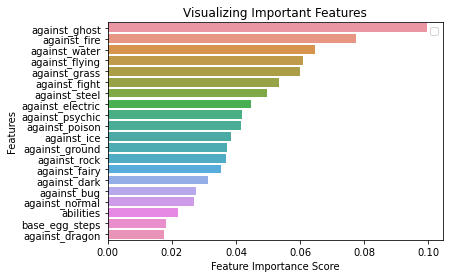

In [20]:
feature_imp = pd.Series(rf_model.feature_importances_, index=fea_name_list).sort_values(ascending=False)  # get feature importance score and sorting

sns_plot = sns.barplot(x=feature_imp[:20], y=feature_imp.index[:20])  # draw top20 important features
fig = sns_plot.get_figure()
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Shapley Value

> Refernce: https://github.com/slundberg/shap
>
> SHAP (SHapley Additive exPlanations) is a game theoretic approach to **explain the output of any machine learning model**. It connects optimal credit allocation with **local explanations** using the classic Shapley values from game theory and their related extensions

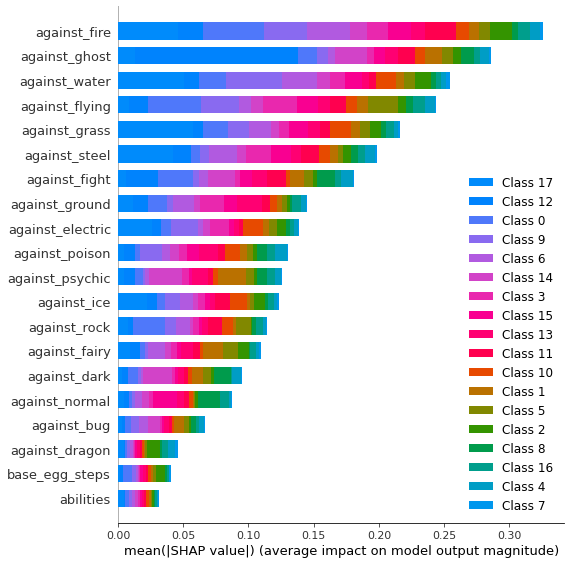

In [21]:
explainer = shap.TreeExplainer(rf_model)  # input rf_model to shap 
shap_values = explainer.shap_values(X_train)  # calculate shap value of X_train

shap.summary_plot(shap_values, X_train, plot_type="bar")  # draw figure

In [101]:
error_data_df = ori_data.iloc[[error_id_observe_on_shap]] 
display(HTML(error_data_df.to_html())) # show error sample

,pokedex_number,name,abilities,generation,classfication,is_legendary,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,hp,sp_attack,sp_defense,speed,type1
111,112,Rhydon,"['Lightningrod', 'Rock Head', 'Reckless']",1,Drill Pokemon,0,1.0,1.0,1.0,0.0,1.0,2.0,0.5,0.5,1.0,4.0,2.0,2.0,0.5,0.25,1.0,0.5,2.0,4.0,130,5120,70,485,60,120,1250000,105,45,45,40,ground


In [104]:
sum_tmp, type1_tmp, df_tmp = ([] for i in range(3)) # initalize list

# calculate shap values
choosen_instance = X.iloc[[error_id_observe_on_shap]] # get error data
shap_values = explainer.shap_values(choosen_instance) # calculate each feature shap value of error sample
error_data_shap_df = pd.DataFrame(shap_values[1],columns=[fea_name_list])
error_data_shap_df.sort_values(by=0, axis=1, ascending=False, inplace=True)

# save value into dataframe for show data
for i in range(18):
  sum_tmp.append(round(shap_values[i].sum(), 3))
  type1_tmp.append(type1_index_info[i])
df_tmp.append(sum_tmp)

# show ori error sample
print(error_msg_string, "\n\nraw data:")
display(HTML(error_data_df.to_html())) 

# show shap value of ori error sample
print("\n\nshap value:")
display(HTML(error_data_shap_df.to_html()))

# show sum of shap value on each type
print("\n\nsum of shap value:")
sum_of_shap_each_type_df = pd.DataFrame(df_tmp, columns=type1_tmp)
sum_of_shap_each_type_df.sort_values(by=0, axis=1, ascending=False, inplace=True)

display(HTML(sum_of_shap_each_type_df.to_html()))
print("\n")

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

Rhydon | Predict: rock, True: ground 

raw data:


,pokedex_number,name,abilities,generation,classfication,is_legendary,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,hp,sp_attack,sp_defense,speed,type1
111,112,Rhydon,"['Lightningrod', 'Rock Head', 'Reckless']",1,Drill Pokemon,0,1.0,1.0,1.0,0.0,1.0,2.0,0.5,0.5,1.0,4.0,2.0,2.0,0.5,0.25,1.0,0.5,2.0,4.0,130,5120,70,485,60,120,1250000,105,45,45,40,ground




shap value:


,against_fight,against_ghost,experience_growth,defense,sp_defense,against_ice,against_bug,sp_attack,abilities,attack,is_legendary,generation,base_total,capture_rate,speed,hp,against_dragon,base_egg_steps,against_dark,against_rock,base_happiness,against_fire,against_normal,against_steel,against_flying,against_ground,against_poison,against_electric,against_water,against_fairy,against_psychic,against_grass
0,0.007121,0.002008,0.000752,0.000693,0.000465,0.000377,0.000139,0.000096,0.000084,0.00008,0.000059,0.000008,0.000002,-0.000066,-0.000195,-0.000624,-0.000775,-0.000798,-0.00112,-0.00136,-0.001584,-0.001627,-0.002096,-0.00213,-0.002356,-0.002718,-0.004183,-0.00422,-0.004612,-0.00466,-0.009474,-0.011018




sum of shap value:


,rock,ground,flying,fairy,steel,ice,dragon,ghost,poison,fighting,dark,electric,fire,psychic,grass,bug,water,normal
0,0.474,0.384,-0.003,-0.022,-0.026,-0.029,-0.033,-0.034,-0.035,-0.036,-0.044,-0.045,-0.062,-0.066,-0.084,-0.099,-0.113,-0.126
